#  Subject 1: CO2 concentration in the atmosphere since 1958

In [5]:
# Importation des bibliothèques nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [6]:
# Téléchargement et chargement des données
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

In [7]:
# Charger les données à partir d'un fichier CSV local
data_file = "weekly_in_situ_co2.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [8]:
data = pd.read_csv(data_file, skiprows=44, sep=r'\s+', engine='python', parse_dates=[0], index_col=[0], names = ['Date', 'Concentration'])

# Affichage des premières lignes des données pour vérification
print(data.head())

            Concentration
Date                     
1958-03-29         316.19
1958-04-05         317.31
1958-04-12         317.69
1958-04-19         317.58
1958-04-26         316.48


In [9]:
data_subset = data.dropna()

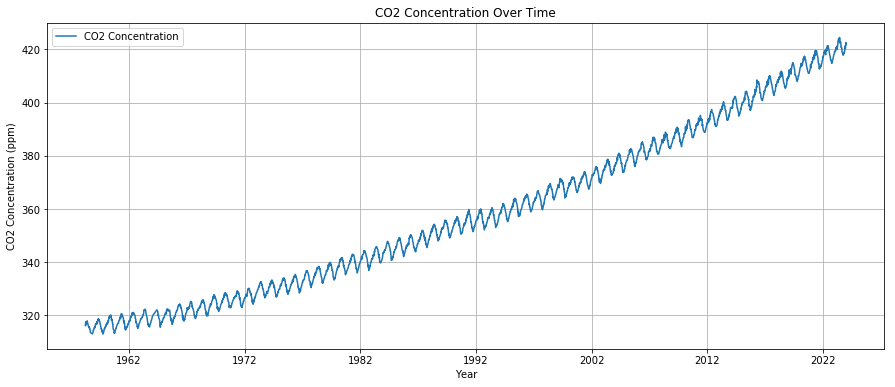

In [10]:
# Réalisation du graphique
plt.figure(figsize=(15, 6))
plt.plot(data, label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

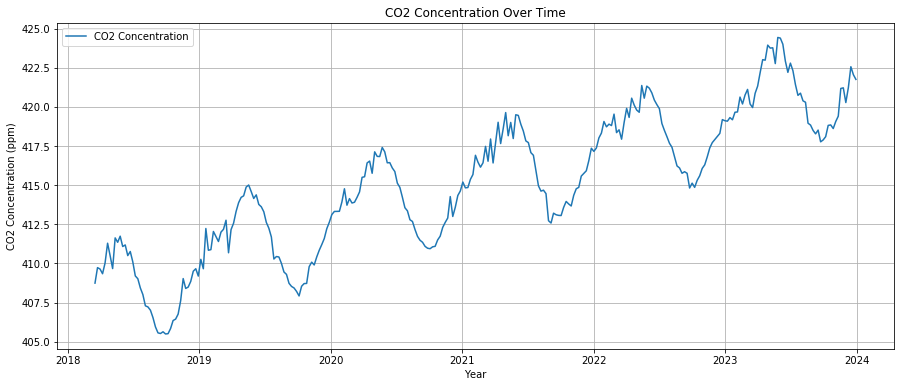

In [11]:
# Réalisation du graphique
plt.figure(figsize=(15, 6))
plt.plot(data[-300:], label='CO2 Concentration')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from statsmodels.tsa.seasonal import STL

# Décomposition de la série temporelle
stl = STL(data['CO2'], seasonal=13)
res = stl.fit()

# Extraction des composantes
trend = res.trend
seasonal = res.seasonal
residual = res.resid

# Affichage des composantes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data['Date'], data['CO2'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data['Date'], trend, label='Tendance')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data['Date'], seasonal, label='Saisonnière')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data['Date'], residual, label='Résiduelle')
plt.legend()

plt.show()

ImportError: cannot import name 'STL'

# Subject 4: Latency and capacity estimation for a network connection from asymmetric measurements


In [13]:
# Importation des bibliothèques nécessaires
url_liglab2 = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/liglab2.log.gz"
url_stackoverflow = "http://mescal.imag.fr/membres/arnaud.legrand/teaching/2014/RICM4_EP_ping/stackoverflow.log.gz"

# Charger les données dans un DataFrame pandas
df_liglab2 = pd.read_csv(url_liglab2, sep=" ", header=None)
df_stackoverflow = pd.read_csv(url_stackoverflow, sep=" ", header=None)

In [14]:
# Affichage des premières lignes des données pour vérification
print(df_liglab2.head())


                     0     1      2     3                   4               5  \
0  [1421761682.052172]   665  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
1  [1421761682.277315]  1373  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
2  [1421761682.502054]   262  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
3  [1421761682.729257]  1107  bytes  from  lig-publig.imag.fr  (129.88.11.7):   
4  [1421761682.934648]  1128  bytes  from  lig-publig.imag.fr  (129.88.11.7):   

            6       7          8   9  
0  icmp_seq=1  ttl=60  time=22.5  ms  
1  icmp_seq=1  ttl=60  time=21.2  ms  
2  icmp_seq=1  ttl=60  time=21.2  ms  
3  icmp_seq=1  ttl=60  time=23.3  ms  
4  icmp_seq=1  ttl=60  time=1.41  ms  


In [15]:
# Affichage des premières lignes des données pour vérification
print(df_stackoverflow.head())

                     0     1      2     3                  4  \
0  [1421771203.082701]  1257  bytes  from  stackoverflow.com   
1  [1421771203.408254]   454  bytes  from  stackoverflow.com   
2  [1421771203.739730]   775  bytes  from  stackoverflow.com   
3  [1421771204.056630]  1334  bytes  from  stackoverflow.com   
4  [1421771204.372224]    83  bytes  from  stackoverflow.com   

                    5           6       7         8   9  
0  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
1  (198.252.206.140):  icmp_seq=1  ttl=50  time=120  ms  
2  (198.252.206.140):  icmp_seq=1  ttl=50  time=126  ms  
3  (198.252.206.140):  icmp_seq=1  ttl=50  time=112  ms  
4  (198.252.206.140):  icmp_seq=1  ttl=50  time=111  ms  


In [16]:
import numpy as np

# Definir una función para extraer la información relevante de cada línea
def process_ping_data(df):
    df.dropna(inplace=True)  # Eliminar filas incompletas
    df.columns = ["date", "size", "bytes", "from", "url", "ip", "icmp","ttl","time", "ms"]  # Nombrar las columnas
    df["time"] = df["time"].str[5:].astype(float)  # Convertir el tiempo a float
    df["date"] = df["date"].str[1:18]
    df["date"] = pd.to_datetime(df["date"], unit='s')
    return df

# Procesar los datos de ping para liglab2 y stackoverflow
df_liglab2 = process_ping_data(df_liglab2)
df_stackoverflow = process_ping_data(df_stackoverflow)


In [17]:
df_stackoverflow

date  size  bytes  from                url  \
0    2015-01-20 16:26:43.082701  1257  bytes  from  stackoverflow.com   
1    2015-01-20 16:26:43.408254   454  bytes  from  stackoverflow.com   
2    2015-01-20 16:26:43.739730   775  bytes  from  stackoverflow.com   
3    2015-01-20 16:26:44.056630  1334  bytes  from  stackoverflow.com   
4    2015-01-20 16:26:44.372224    83  bytes  from  stackoverflow.com   
5    2015-01-20 16:26:44.688367   694  bytes  from  stackoverflow.com   
6    2015-01-20 16:26:45.005514  1577  bytes  from  stackoverflow.com   
7    2015-01-20 16:26:45.321112   632  bytes  from  stackoverflow.com   
8    2015-01-20 16:26:45.637464   405  bytes  from  stackoverflow.com   
9    2015-01-20 16:26:45.953472  1419  bytes  from  stackoverflow.com   
10   2015-01-20 16:26:46.269163   329  bytes  from  stackoverflow.com   
11   2015-01-20 16:26:46.585098   868  bytes  from  stackoverflow.com   
12   2015-01-20 16:26:46.901972  1714  bytes  from  stackoverflow.com   
13   2015-01-20 16:26:47.217863  1053  bytes  from  stackoverflow.com   
14   2015-01-20 16:26:47.533900   349  bytes  from  stackoverflow.com   
15   2015-01-20 16:26:47.851148  1598  bytes  from  stackoverflow.com   
16   2015-01-20 16:26:48.166794  1412  bytes  from  stackoverflow.com   
17   2015-01-20 16:26:48.482159   167  bytes  from  stackoverflow.com   
18   2015-01-20 16:26:48.798155    60  bytes  from  stackoverflow.com   
19   2015-01-20 16:26:49.114480  1038  bytes  from  stackoverflow.com   
20   2015-01-20 16:26:49.430586   949  bytes  from  stackoverflow.com   
21   2015-01-20 16:26:49.746729   279  bytes  from  stackoverflow.com   
22   2015-01-20 16:26:50.062322   757  bytes  from  stackoverflow.com   
23   2015-01-20 16:26:50.378113  1355  bytes  from  stackoverflow.com   
24   2015-01-20 16:26:50.694015  1151  bytes  from  stackoverflow.com   
25   2015-01-20 16:26:51.009670   237  bytes  from  stackoverflow.com   
26   2015-01-20 16:26:51.324856  1221  bytes  from  stackoverflow.com   
27   2015-01-20 16:26:51.640544  1063  bytes  from  stackoverflow.com   
28   2015-01-20 16:26:51.956109   445  bytes  from  stackoverflow.com   
29   2015-01-20 16:26:52.272504  1619  bytes  from  stackoverflow.com   
...                         ...   ...    ...   ...                ...   
6857 2015-01-20 17:04:11.530711   234  bytes  from  stackoverflow.com   
6858 2015-01-20 17:04:11.847515   231  bytes  from  stackoverflow.com   
6859 2015-01-20 17:04:12.163837  1495  bytes  from  stackoverflow.com   
6860 2015-01-20 17:04:12.479834  1313  bytes  from  stackoverflow.com   
6861 2015-01-20 17:04:12.795239   182  bytes  from  stackoverflow.com   
6862 2015-01-20 17:04:13.111570  2000  bytes  from  stackoverflow.com   
6863 2015-01-20 17:04:13.427110  1396  bytes  from  stackoverflow.com   
6864 2015-01-20 17:04:13.742351   515  bytes  from  stackoverflow.com   
6865 2015-01-20 17:04:14.058100   590  bytes  from  stackoverflow.com   
6866 2015-01-20 17:04:14.373566   229  bytes  from  stackoverflow.com   
6867 2015-01-20 17:04:14.689196   806  bytes  from  stackoverflow.com   
6868 2015-01-20 17:04:15.007766   422  bytes  from  stackoverflow.com   
6869 2015-01-20 17:04:15.324571  1939  bytes  from  stackoverflow.com   
6870 2015-01-20 17:04:15.639814   365  bytes  from  stackoverflow.com   
6871 2015-01-20 17:04:15.954957   502  bytes  from  stackoverflow.com   
6872 2015-01-20 17:04:16.272951  1738  bytes  from  stackoverflow.com   
6873 2015-01-20 17:04:16.591915  1148  bytes  from  stackoverflow.com   
6874 2015-01-20 17:04:16.915868   294  bytes  from  stackoverflow.com   
6875 2015-01-20 17:04:17.231617  1534  bytes  from  stackoverflow.com   
6876 2015-01-20 17:04:17.546404  1103  bytes  from  stackoverflow.com   
6877 2015-01-20 17:04:17.861499  1121  bytes  from  stackoverflow.com   
6878 2015-01-20 17:04:18.177030  1219  bytes  from  stackoverflow.com   
6879 2015-01-20 17:04:18.493444  1880  bytes  from  stackoverflow.com   
6880 2015-01

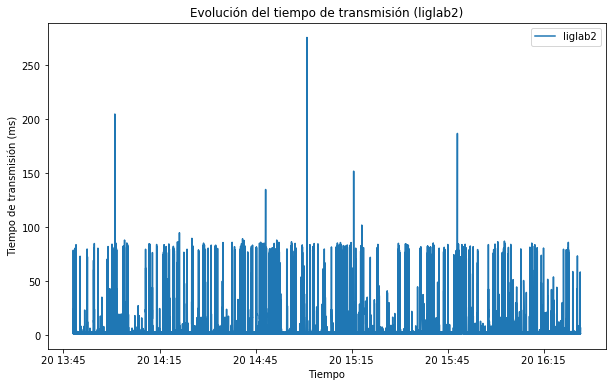

In [18]:
import matplotlib.pyplot as plt

# Gráfico del tiempo de transmisión a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_liglab2["date"], df_liglab2["time"], label="liglab2")
plt.xlabel("Tiempo")
plt.ylabel("Tiempo de transmisión (ms)")
plt.title("Evolución del tiempo de transmisión (liglab2)")
plt.legend()
plt.show()